<a href="https://colab.research.google.com/github/Ahmedwagdymohy/Ai-trained_model_Cifar-10/blob/main/Cifar_10_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 8, 8, 64)          0         
                                                                 
 flatten_13 (Flatten)        (None, 4096)            

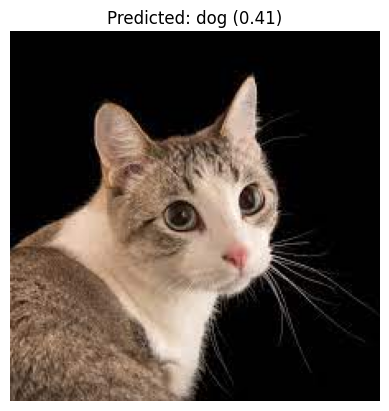

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt   #to show the images
from keras.preprocessing import image  #to load the new image from the user


(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # load the data-set which is Cifar10

# i made this just to make the classes more readable not just from 0 -9
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

#  pixel to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# -------------------------------------------the model ----------------------------------------------------
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=5, strides=(1, 1), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3))) # 32*32*32
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=(1, 1), padding='same', activation=tf.nn.relu)) # 16*16*64
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

# -------------------------------------------end of the model ----------------------------------------------------


model.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_test, y_test))   # model fit

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

num_samples_to_predict = 5  # the num of imgs to test the prediction
sample_indices = np.random.randint(0, len(x_test), num_samples_to_predict)
sample_images = x_test[sample_indices]

predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)


for i in range(num_samples_to_predict):   #print the data and the predicted
    plt.figure()
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[y_test[sample_indices[i]][0]]}")
    plt.axis('off')
    plt.show()


# -----------------------------we need to be creative so i tried to give the model new img and let 'em predict :))----------------------------------

# to load a new image
new_image_path = '/content/cat.jpg'
new_img = tf.keras.utils.load_img('/content/cat.jpg', target_size=(32, 32))
new_img = tf.keras.utils.img_to_array(new_img)
new_img /= 255
new_img = np.expand_dims(new_img, axis=0)

# Make prediction
prediction = model.predict(new_img)
predicted_class = np.argmax(prediction)

#show the image
plt.imshow(tf.keras.utils.load_img(new_image_path))
plt.title(f"Predicted: {class_names[predicted_class]} ({prediction[0][predicted_class]:.2f})")
plt.axis('off')
plt.show()

